In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [86]:
post = pd.read_csv('postal_package_data.csv')

In [87]:
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
WIDTH     2000 non-null int64
HEIGHT    2000 non-null int64
DEPTH     2000 non-null int64
PRICE     2000 non-null int64
dtypes: int64(4)
memory usage: 62.6 KB


In [88]:
post.head()

,WIDTH,HEIGHT,DEPTH,PRICE
0,52,61,61,52
1,111,96,67,49
2,143,96,92,36
3,6,148,177,52
4,117,34,128,47


In [89]:
post.describe()

,WIDTH,HEIGHT,DEPTH,PRICE
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,100.004500,100.475500,100.161500,52.373000
std,38.940399,39.884179,38.837889,14.838664
min,1.000000,0.000000,0.000000,15.000000
25%,74.000000,72.000000,73.000000,42.000000
50%,99.000000,102.000000,100.000000,52.000000
75%,126.000000,127.000000,127.000000,62.000000
max,228.000000,225.000000,242.000000,106.000000


In [90]:
post.describe()

,WIDTH,HEIGHT,DEPTH,PRICE
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,100.004500,100.475500,100.161500,52.373000
std,38.940399,39.884179,38.837889,14.838664
min,1.000000,0.000000,0.000000,15.000000
25%,74.000000,72.000000,73.000000,42.000000
50%,99.000000,102.000000,100.000000,52.000000
75%,126.000000,127.000000,127.000000,62.000000
max,228.000000,225.000000,242.000000,106.000000


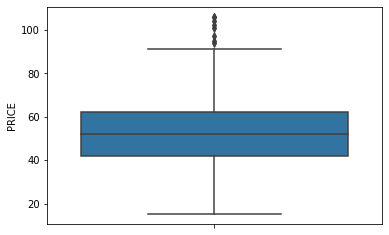

In [91]:
sns.boxplot( y=post["PRICE"] )
#sns.plt.show()

In [92]:
from scipy import stats
post = post[(np.abs(stats.zscore(post)) < 3).all(axis=1)]

In [93]:
post.describe()

,WIDTH,HEIGHT,DEPTH,PRICE
count,1984.000000,1984.000000,1984.000000,1984.000000
mean,99.732359,100.385081,100.073085,52.226310
std,38.476620,39.682984,38.536374,14.605614
min,1.000000,0.000000,0.000000,15.000000
25%,74.000000,72.000000,73.000000,42.000000
50%,99.000000,102.000000,100.000000,52.000000
75%,125.250000,127.000000,127.000000,62.000000
max,208.000000,220.000000,213.000000,95.000000


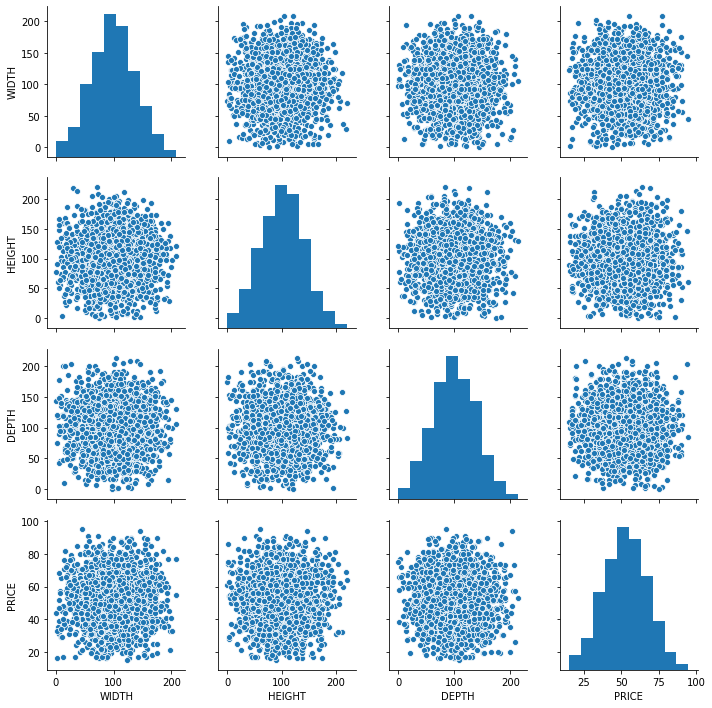

In [94]:
sns.pairplot(post)

In [95]:
#post['price_log'] = np.log(post['PRICE'])

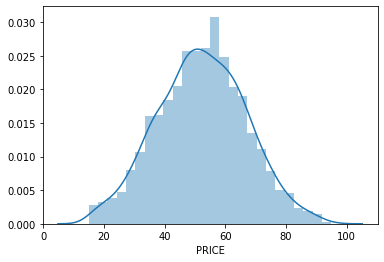

In [96]:
sns.distplot((post['PRICE']))

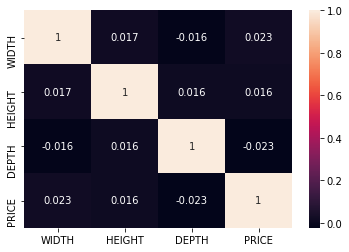

In [97]:
sns.heatmap(post.corr(), annot=True)

In [99]:
#separating independent and dependent variable
y = post['PRICE']
X = post.drop('PRICE', axis=1)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [104]:

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [105]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
#     ('normalizer', Normalizer()),
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [106]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [107]:
# print the intercept
print(lin_reg.intercept_)

52.66187594553706


In [110]:
pred = lin_reg.predict(X_test)

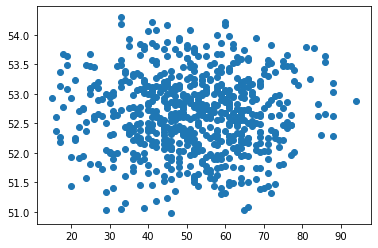

In [111]:
plt.scatter(y_test, pred)

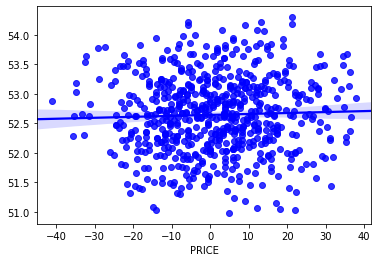

In [126]:
residual = pred - y_test 
sns.regplot(x = residual, y = pred, data = None, scatter = True, color = 'b')

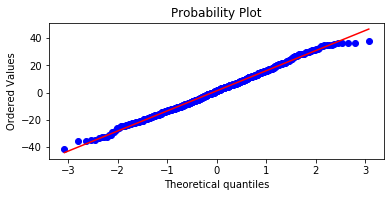

In [127]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [116]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
print(df.head(10))

      Actual  Predicted
1331      52  52.813616
76        70  51.399276
535       53  52.023127
634       47  52.367586
1514      61  52.610867
966       45  51.234520
892       33  53.488849
1823      47  53.138696
136       71  52.035605
18        47  52.440821


In [114]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,11.911223,217.688363,14.754266,-0.008961


In [136]:
np.mean(residual)

1.2869058383366596

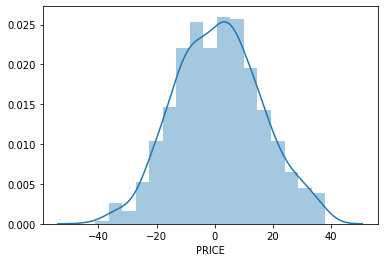

In [134]:
sns.distplot(residual)

In [113]:
import sklearn.metrics as metrics

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 11.911223245190913
MSE: 217.68836318060025
RMSE: 14.754265931607721
R2 Square -0.008960516328481383
Train set evaluation:
_____________________________________
MAE: 11.725352411120854
MSE: 210.98955010743555
RMSE: 14.525479341744132
R2 Square 0.0018310677234257833


In [118]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
WIDTH,0.566925
HEIGHT,0.105489
DEPTH,-0.216557
